In [140]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns



dir_data = 'data'
dir_output = 'output'

df = pd.read_csv(os.path.join(dir_data, 'herodata.csv'))
df = df.loc[df['role'] != 'Support']
df = df.drop(['speed', 'sight', 'life_scale', 'life_regenScale', 'weapon_damageScale'], axis=1)

# keep most important features
# df = df[['hero', 'role', 'rating_damage', 'life_regenRate', 'life_amount']]
# df = df[['hero', 'role', 'rating_damage', 'life_regenRate', 'life_amount', 'weapon_range']]


X = df.drop(['hero', 'role'], axis=1)   # features
y = df[['role']]                        # labels

In [141]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# dictionary to hold models accuracy
accuracy_dict = dict()

# implement shuffle split to conduct cross validation to evaluate
# performace across models
sf = ShuffleSplit(n_splits=5, random_state=0, test_size=0.3)

In [142]:
### Random Forest ###
accuracy_dict['Random Forest'] = list()

for test, train in sf.split(X):  # loop through each fold

    # split into testing and training data for each fold
    X_train, y_train, X_test, y_test = X.iloc[train], y.iloc[train], X.iloc[test], y.iloc[test]

    # fit model
    rf = RandomForestClassifier(n_estimators=500, max_depth=2).fit(X_train, y_train)

    # Predict the response 
    rf_train_pred = rf.predict(X_train)
    rf_test_pred = rf.predict(X_test)

    # Model Accuracy
    acc_train = metrics.accuracy_score(y_train, rf_train_pred)
    acc_test = metrics.accuracy_score(y_test, rf_test_pred)
    print("Accuracy on Test Data:", acc_train)
    print("Accuracy on Training Data:", acc_test)

    accuracy_dict['Random Forest'].append(acc_test)
    # print results of predict
    # print('Actual - Prediction')
    # for yt, yp in zip(y_test.to_numpy(), y_pred):
    #     print(yt[0], '-', yp)




C:\Users\bxjxr\AppData\Local\Temp/ipykernel_2156/755121259.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=500, max_depth=2).fit(X_train, y_train)


Accuracy on Test Data: 0.9615384615384616
Accuracy on Training Data: 0.6101694915254238


C:\Users\bxjxr\AppData\Local\Temp/ipykernel_2156/755121259.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=500, max_depth=2).fit(X_train, y_train)


Accuracy on Test Data: 0.9615384615384616
Accuracy on Training Data: 0.576271186440678


C:\Users\bxjxr\AppData\Local\Temp/ipykernel_2156/755121259.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=500, max_depth=2).fit(X_train, y_train)


Accuracy on Test Data: 0.8846153846153846
Accuracy on Training Data: 0.4745762711864407


C:\Users\bxjxr\AppData\Local\Temp/ipykernel_2156/755121259.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=500, max_depth=2).fit(X_train, y_train)


Accuracy on Test Data: 1.0
Accuracy on Training Data: 0.6949152542372882


C:\Users\bxjxr\AppData\Local\Temp/ipykernel_2156/755121259.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=500, max_depth=2).fit(X_train, y_train)


Accuracy on Test Data: 0.9230769230769231
Accuracy on Training Data: 0.559322033898305


No handles with labels found to put in legend.


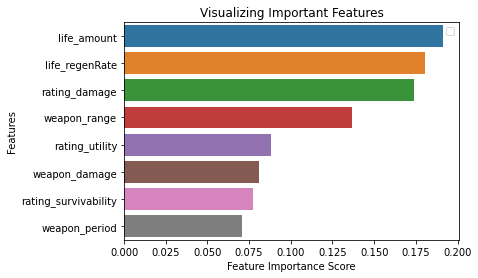

In [143]:
# Evaluate Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=df.columns[2:]).sort_values(ascending=False)

# Create a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [144]:
# save model to disk
pickle.dump(clf, open('rf_model.sav', 'wb'))

In [145]:
accuracy_dict['Gaussian Naive Bayes'] = list()

for test, train in sf.split(X):  # loop through each fold

    # split into testing and training data for each fold
    X_train, y_train, X_test, y_test = X.iloc[train], y.iloc[train], X.iloc[test], y.iloc[test]

    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB().fit(X_train, y_train)
    gnb_train_pred = gnb.predict(X_train)
    gnb_test_pred = gnb.predict(X_test)

    acc_train = metrics.accuracy_score(y_train, gnb_train_pred)
    acc_test = metrics.accuracy_score(y_test, gnb_test_pred)
    print("Accuracy on Test Data:", acc_train)
    print("Accuracy on Training Data:", acc_test)

    accuracy_dict['Gaussian Naive Bayes'].append(acc_test)

c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A

Accuracy on Test Data: 1.0
Accuracy on Training Data: 0.6271186440677966
Accuracy on Test Data: 0.8461538461538461
Accuracy on Training Data: 0.576271186440678
Accuracy on Test Data: 1.0
Accuracy on Training Data: 0.576271186440678
Accuracy on Test Data: 0.8846153846153846
Accuracy on Training Data: 0.6610169491525424
Accuracy on Test Data: 0.9615384615384616
Accuracy on Training Data: 0.5932203389830508


In [146]:
accuracy_dict['Multinomial Naive Bayes'] = list()

for test, train in sf.split(X):  # loop through each fold

    # split into testing and training data for each fold
    X_train, y_train, X_test, y_test = X.iloc[train], y.iloc[train], X.iloc[test], y.iloc[test]

    mnb = MultinomialNB().fit(X_train, y_train)
    mnb_train_pred = mnb.predict(X_train)
    mnb_test_pred = mnb.predict(X_test)

    acc_train = metrics.accuracy_score(y_train, mnb_train_pred) 
    acc_test =  metrics.accuracy_score(y_test, mnb_test_pred)
    print("Accuracy on Test Data:", acc_train)
    print("Accuracy on Training Data:", acc_test)

    accuracy_dict['Multinomial Naive Bayes'].append(acc_test)


Accuracy on Test Data: 0.5769230769230769
Accuracy on Training Data: 0.423728813559322
Accuracy on Test Data: 0.6153846153846154
Accuracy on Training Data: 0.3898305084745763
Accuracy on Test Data: 0.6923076923076923
Accuracy on Training Data: 0.5423728813559322
Accuracy on Test Data: 0.5769230769230769
Accuracy on Training Data: 0.576271186440678
Accuracy on Test Data: 0.46153846153846156
Accuracy on Training Data: 0.5084745762711864


c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bxjxr\Desktop\Projects\hots-classifier-app\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A

In [198]:
acc_df = pd.DataFrame(accuracy_dict)
print(acc_df, '\n')

mean_acc_df = acc_df.mean(axis=0).sort_values(ascending=False)
print(mean_acc_df, '\n')

# Ranged Assassin is the most likely by chance
random_chance = df.loc[df['role'] == 'Ranged Assassin'].count()['role'] / df.count()['role']
print('Accuracy of Guessing Ranged Assassin:', random_chance) 

mean_acc_df = (mean_acc_df.append(pd.Series(random_chance, index=['Random Chance']))
                .to_frame()
                .reset_index()
            )
mean_acc_df.columns = ['Models', 'Accuracy']
mean_acc_df

   Random Forest  Gaussian Naive Bayes  Multinomial Naive Bayes
0       0.610169              0.627119                 0.423729
1       0.576271              0.576271                 0.389831
2       0.474576              0.576271                 0.542373
3       0.694915              0.661017                 0.576271
4       0.559322              0.593220                 0.508475 

Gaussian Naive Bayes       0.606780
Random Forest              0.583051
Multinomial Naive Bayes    0.488136
dtype: float64 

Accuracy of Guessing Ranged Assassin: 0.3411764705882353


,Models,Accuracy
0,Gaussian Naive Bayes,0.606780
1,Random Forest,0.583051
2,Multinomial Naive Bayes,0.488136
3,Random Chance,0.341176


No handles with labels found to put in legend.


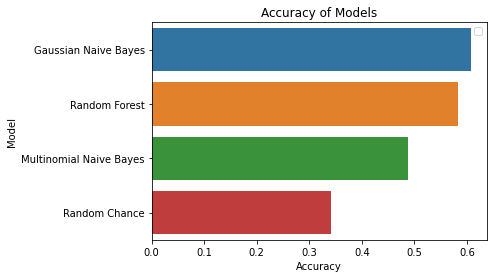

In [206]:
sns.barplot(x='Accuracy', y='Models', data=mean_acc_df)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title("Accuracy of Models")
plt.legend()
plt.show()

In [150]:
df.head()

,hero,role,rating_damage,rating_survivability,rating_utility,life_amount,life_regenRate,weapon_damage,weapon_period,weapon_range
1,Alarak,Melee Assasin,7.0,6.0,7.0,1950.0,4.0585,150.0,0.8332,1.5
2,Alexstrasza,Healer,3.0,4.0,6.0,1698.0,3.5390,73.0,1.0000,5.5
3,Cassia,Ranged Assasin,7.0,6.0,5.0,1660.0,3.4570,120.0,0.9000,2.0
4,Ana,Healer,3.0,3.0,7.0,1598.0,3.3281,30.0,0.7500,6.5
5,Anduin,Healer,2.0,4.0,7.0,1665.0,3.4687,85.0,1.0000,5.5
